# Loading data into Pyleoclim objects

To simplify the remainder of the examples in this notebook, we'll load the LiPD data into pickle objects which can be stored and easily loaded later. These are python native data objects, so we're essentially trading the flexibility of the LiPD files for the convenience of pickle files.

In [2]:
import pickle
import os

from tqdm import tqdm

import pyleoclim as pyleo

from pylipd.lipd import LiPD

Make a directory for the pickle files if it doesn't yet exist:

In [3]:
pickle_dir = '../../data/pickle'
if not os.path.exists(pickle_dir):
    os.makedirs(pickle_dir)

Loading and processing the data:

In [2]:
data_path = '../../data/LiPD/full'
D = LiPD()
D.load_from_dir(data_path)
lipd_records = D.get_all_dataset_names()

series_dict = {}
processed_series_dict = {}

ens_dict = {}
processed_ens_dict = {}

holocene_bounds = (0,10000)

for record in tqdm(lipd_records):
    D = LiPD()
    D.load(os.path.join(data_path,f'{record}.lpd'))
    df = D.get_timeseries_essentials().iloc[0]
    series = pyleo.GeoSeries(
        time = df['time_values'],
        value=df['paleoData_values'],
        time_name = 'Age',
        time_unit = 'yrs BP',
        value_name = r'$\delta^{18} O$',
        value_unit = u'‰',
        label=record,
        lat = df['geo_meanLat'],
        lon=df['geo_meanLon'],
        archiveType='speleothem',
        dropna=False,
        verbose = False   
    )

    if record == 'Qunf.Oman.2023': # Removing a large hiatus from the Qunf record
        series = series.slice((2500,10000))

    processed_series = series.slice(holocene_bounds).interp().standardize().detrend(method='savitzky-golay')

    series_dict[record] = series
    processed_series_dict[record] = processed_series

    ens_df = D.get_ensemble_tables().iloc[0]
    ens_series_list = []
    processed_ens_series_list = []
    for i in range(1000): #We know there are 1000 ensemble members
        ens_series = pyleo.GeoSeries(
            time = ens_df['ensembleVariableValues'].T[i],
            value= df['paleoData_values'],
            time_name = 'Age',
            time_unit = 'yrs BP',
            value_name = r'$\delta^{18} O$',
            value_unit = u'‰',
            label=record,
            lat = df['geo_meanLat'],
            lon=df['geo_meanLon'],
            archiveType='speleothem',
            dropna=False,
            verbose=False
        )

        if record == 'Qunf.Oman.2023': # Removing a large hiatus from the Qunf record
            ens_series = ens_series.slice((2500,10000))
        
        processed_ens_series = ens_series.slice(holocene_bounds).interp().standardize().detrend(method='savitzky-golay')

        ens_series_list.append(ens_series)
        processed_ens_series_list.append(processed_ens_series)
    
    ens_dict[record] = pyleo.EnsembleGeoSeries(ens_series_list)
    processed_ens_dict[record] = pyleo.EnsembleGeoSeries(processed_ens_series_list)

Loading 14 LiPD files


100%|██████████| 14/14 [00:02<00:00,  5.08it/s]


Loaded..


  0%|          | 0/14 [00:00<?, ?it/s]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00, 11.21it/s]


Loaded..


  7%|▋         | 1/14 [00:01<00:25,  1.97s/it]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


Loaded..


 14%|█▍        | 2/14 [00:09<01:04,  5.36s/it]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00, 11.86it/s]


Loaded..


 21%|██▏       | 3/14 [00:11<00:39,  3.61s/it]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00, 11.40it/s]


Loaded..


 29%|██▊       | 4/14 [00:12<00:28,  2.87s/it]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Loaded..


 36%|███▌      | 5/14 [00:17<00:31,  3.52s/it]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


Loaded..


 43%|████▎     | 6/14 [00:20<00:26,  3.27s/it]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00,  7.43it/s]


Loaded..


 50%|█████     | 7/14 [00:22<00:21,  3.02s/it]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


Loaded..


 57%|█████▋    | 8/14 [00:29<00:25,  4.28s/it]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00,  4.85it/s]


Loaded..


 64%|██████▍   | 9/14 [00:33<00:20,  4.20s/it]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00,  6.07it/s]


Loaded..


 71%|███████▏  | 10/14 [00:37<00:15,  3.88s/it]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00,  6.92it/s]


Loaded..


 79%|███████▊  | 11/14 [00:39<00:10,  3.48s/it]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


Loaded..


 86%|████████▌ | 12/14 [00:43<00:07,  3.67s/it]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00,  4.19it/s]


Loaded..


 93%|█████████▎| 13/14 [00:48<00:03,  3.94s/it]

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00, 11.11it/s]


Loaded..


100%|██████████| 14/14 [00:49<00:00,  3.54s/it]


Plotting each record and its ensemble for QA/QC:

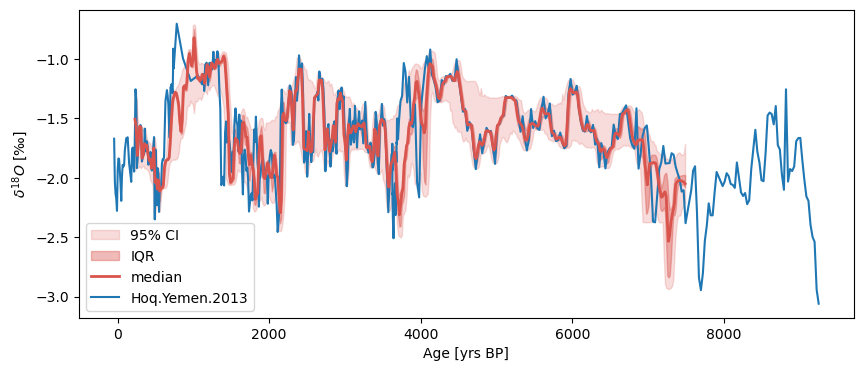

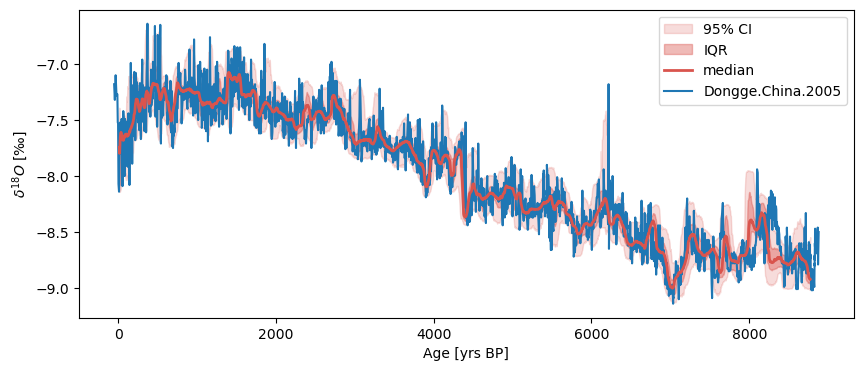

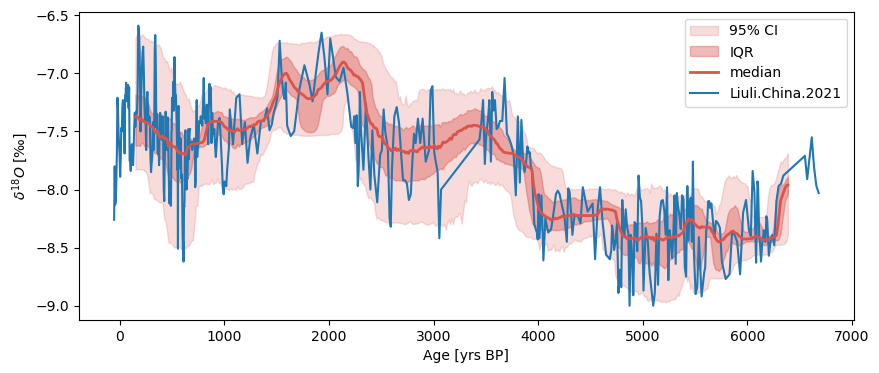

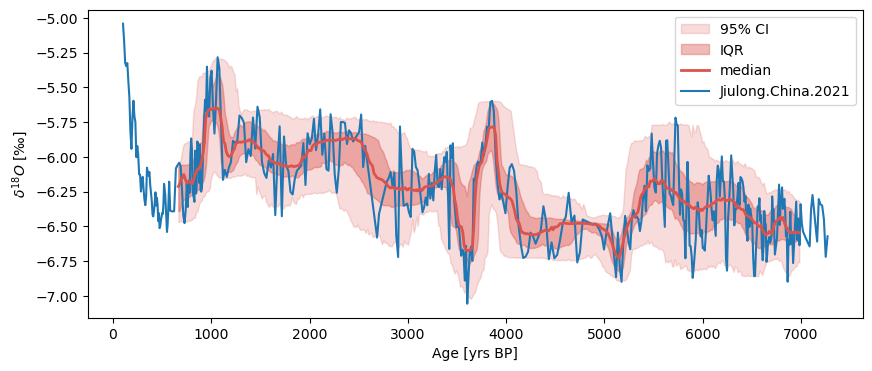

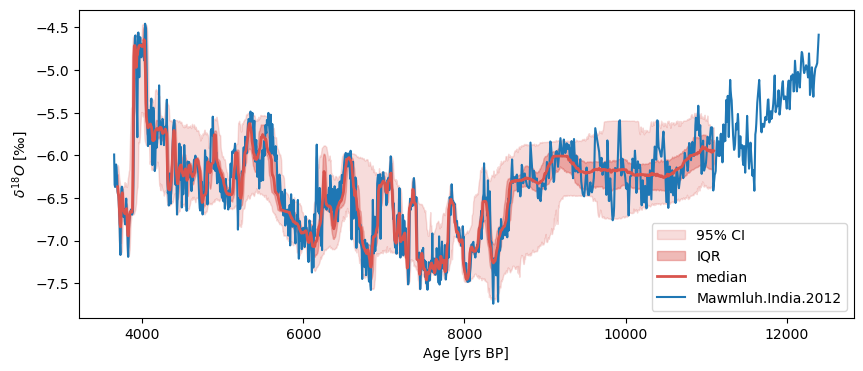

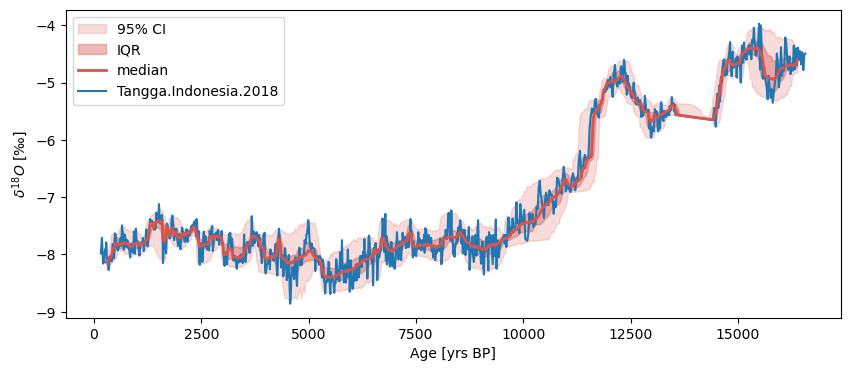

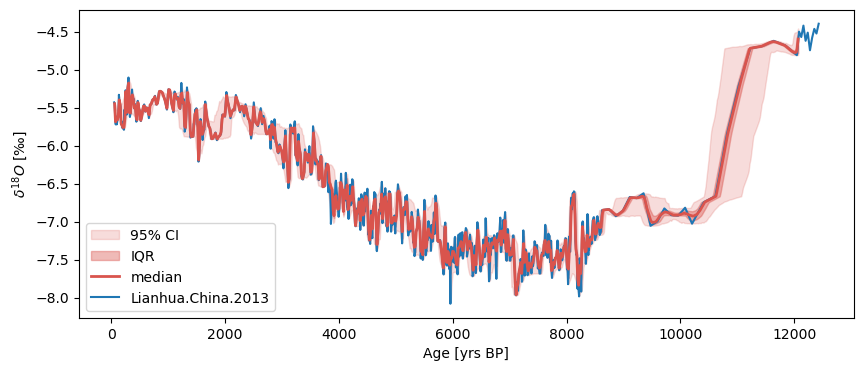

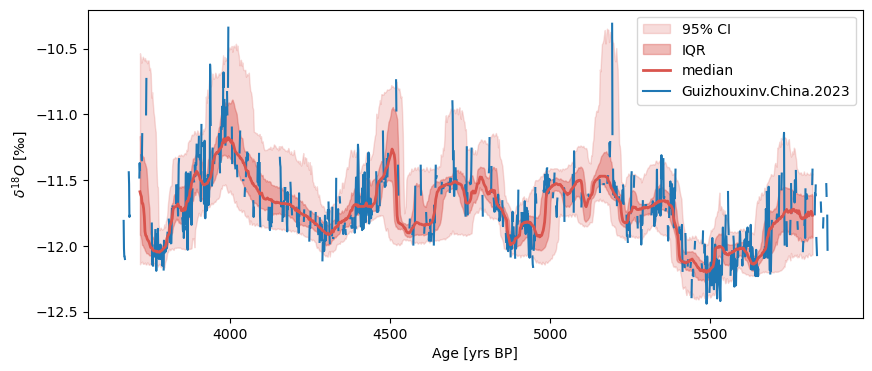

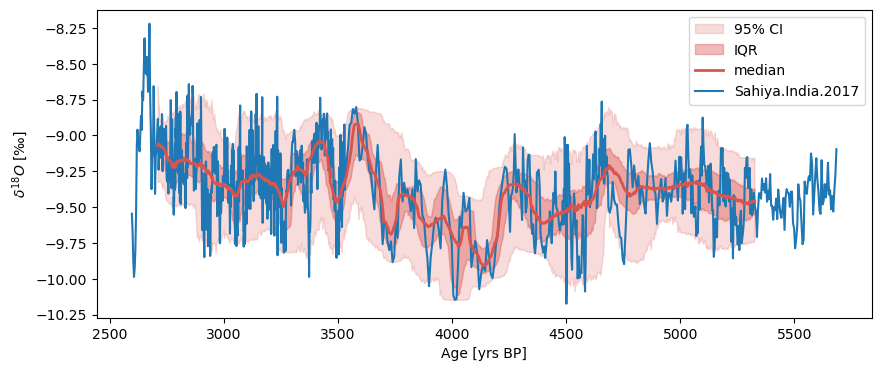

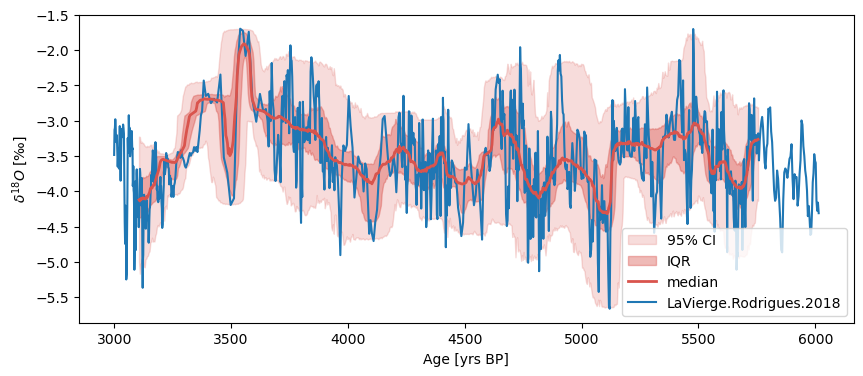

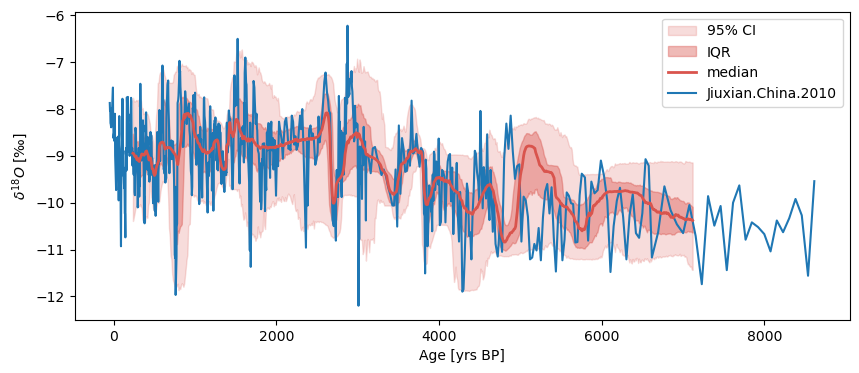

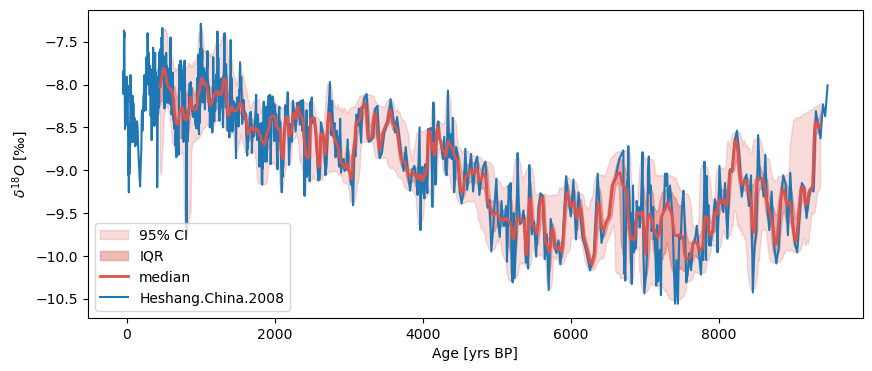

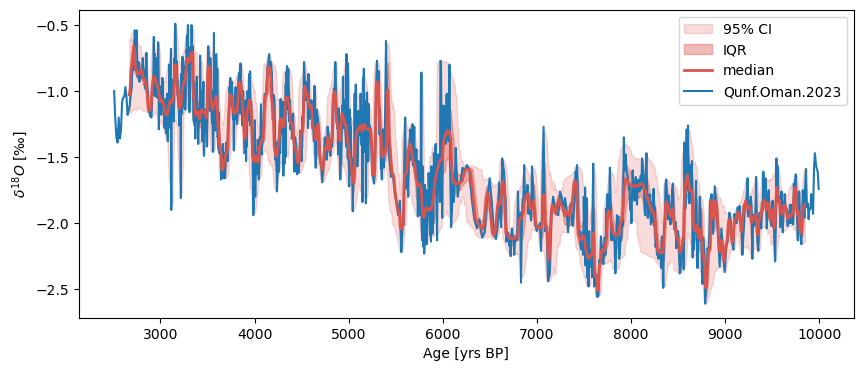

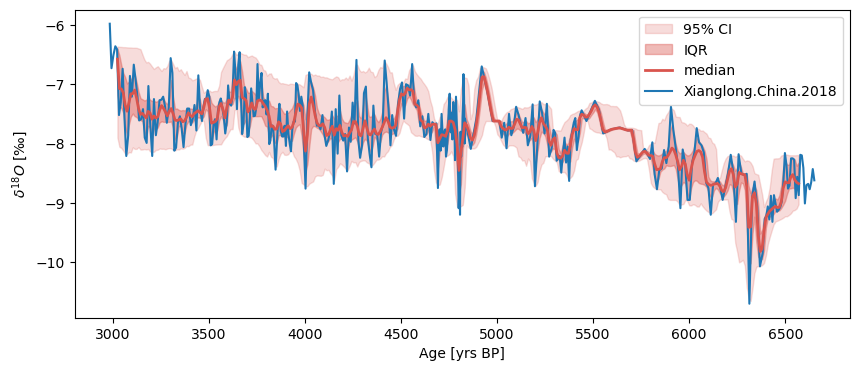

In [3]:
for label,series in series_dict.items():
    ens = ens_dict[label]
    fig,ax = ens.common_time().plot_envelope()
    series.plot(ax=ax)


Saving the data:

In [4]:
with open('../../data/pickle/series_dict.pkl','wb') as handle:
    pickle.dump(series_dict,handle)

with open('../../data/pickle/ens_dict.pkl','wb') as handle:
    pickle.dump(ens_dict,handle)

Plotting each processed record and its ensemble for QA/QC:

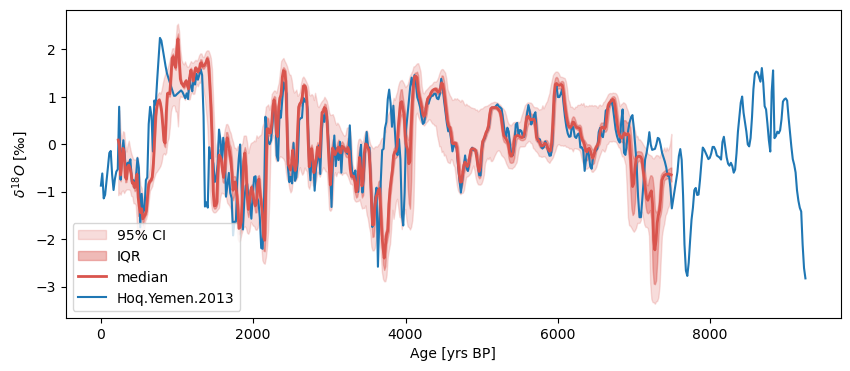

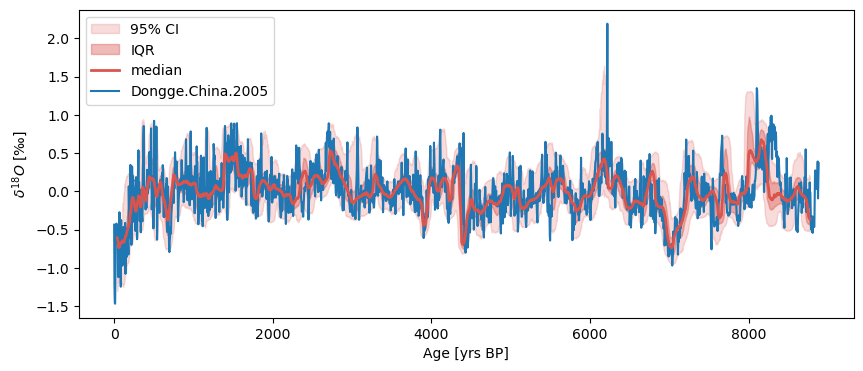

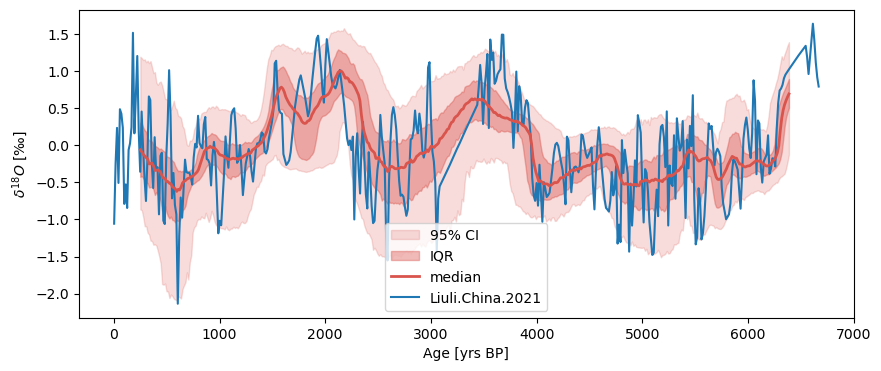

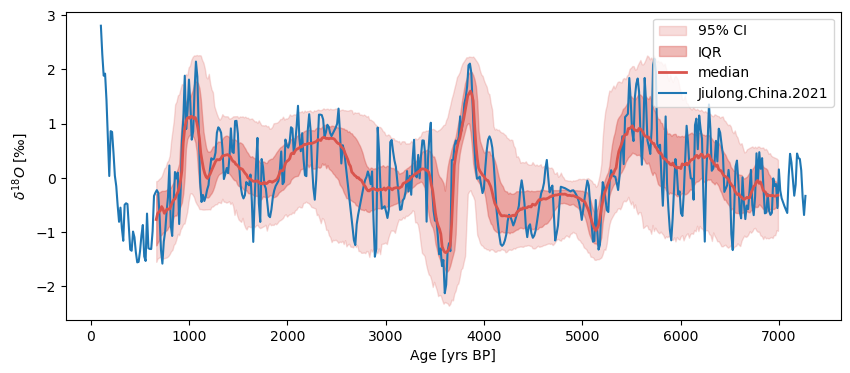

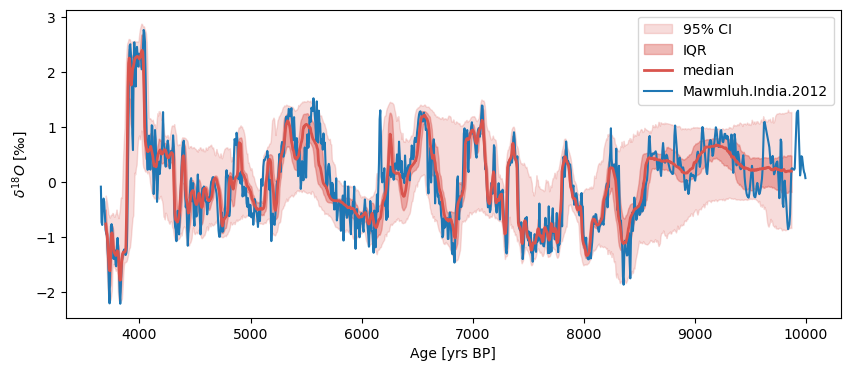

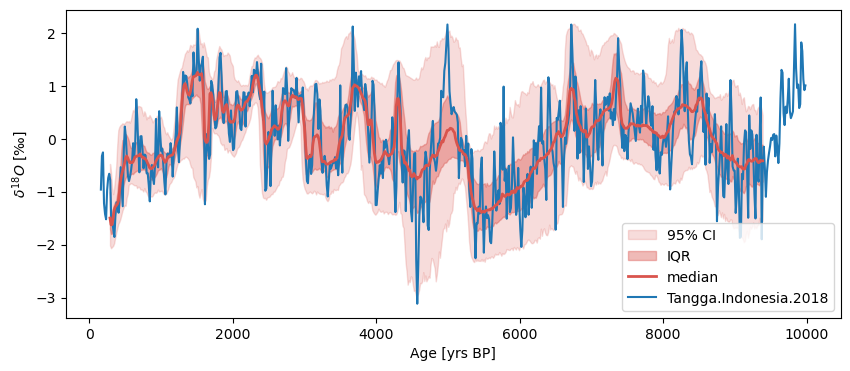

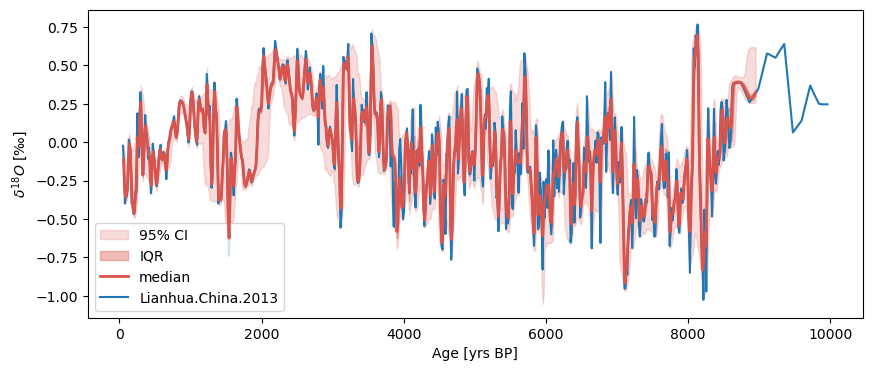

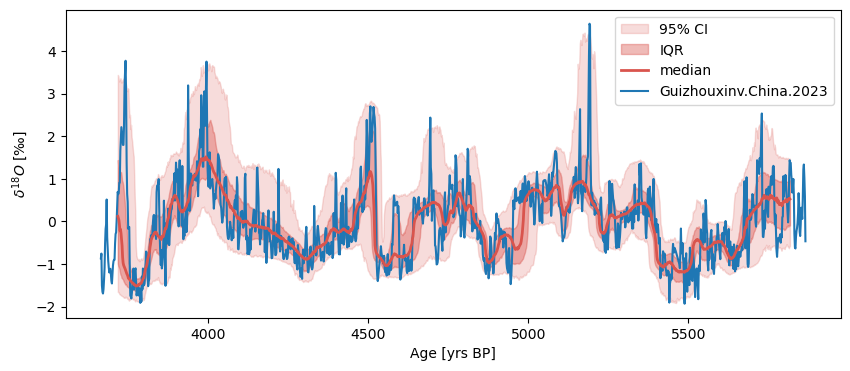

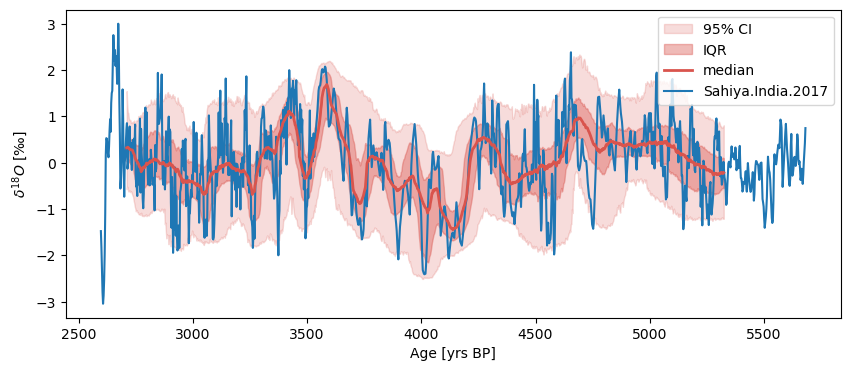

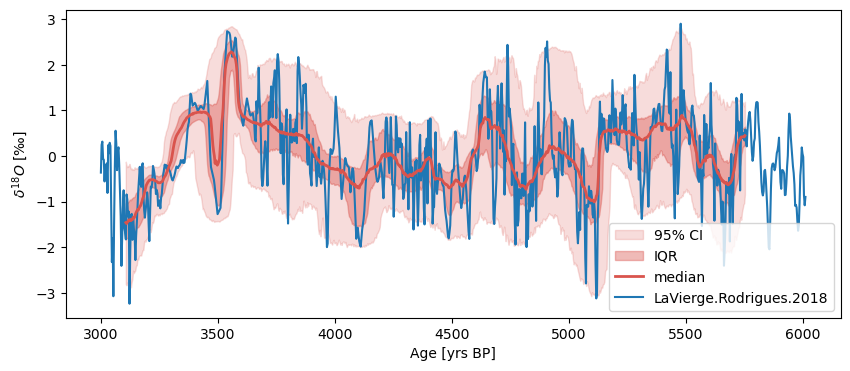

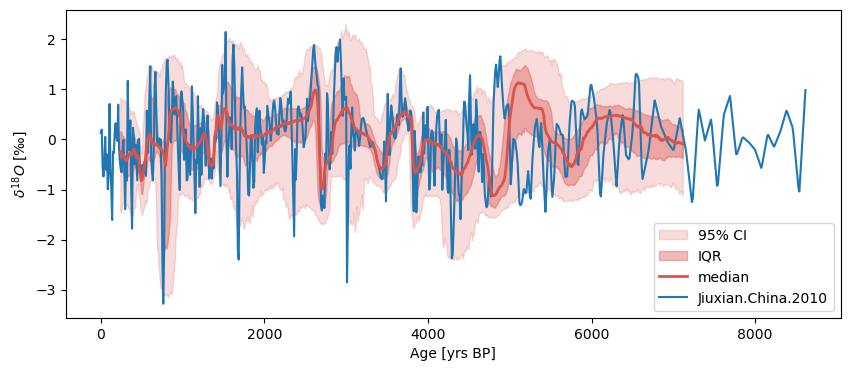

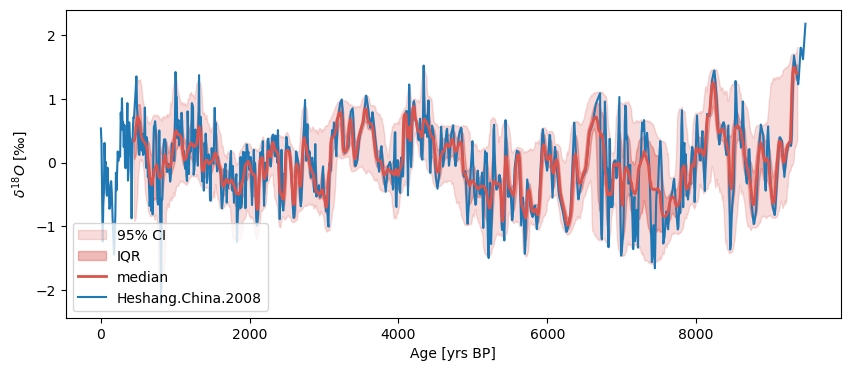

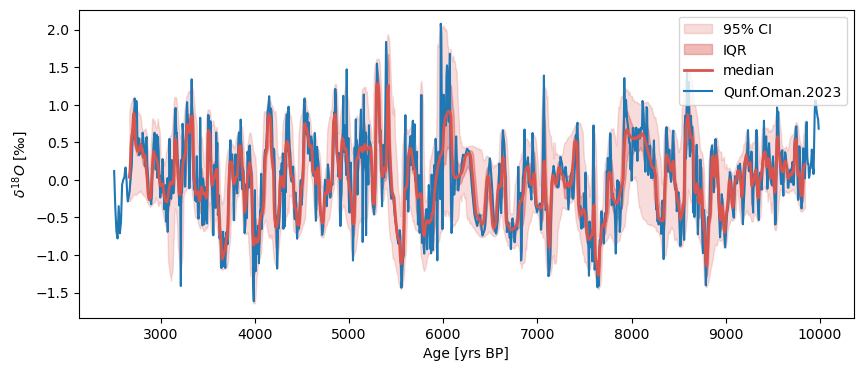

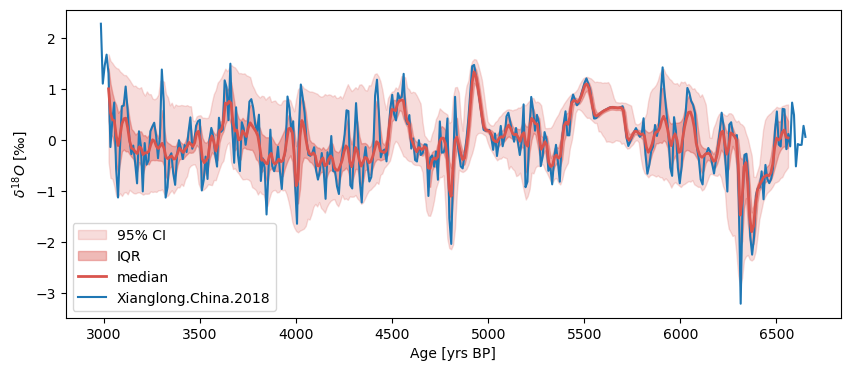

In [5]:
for label,series in processed_series_dict.items():
    ens = processed_ens_dict[label]
    fig,ax = ens.common_time().plot_envelope()
    series.plot(ax=ax)

Saving the processed records and their ensembles:

In [6]:
with open('../../data/pickle/preprocessed_series_dict.pkl','wb') as handle:
    pickle.dump(processed_series_dict,handle)

with open('../../data/pickle/preprocessed_ens_dict.pkl','wb') as handle:
    pickle.dump(processed_ens_dict,handle)